# Random Forest with K-Fold Cross Validation and Feature Importance

This notebook demonstrates how to train and evaluate a **Random Forest Classifier** using **K-Fold Cross Validation** and how to compute and visualize **feature importance** using the Breast Cancer dataset.

In [1]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report


In [2]:

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Dataset shape:", X.shape)
print("Target distribution:", np.bincount(y))


Dataset shape: (569, 30)
Target distribution: [212 357]


In [9]:
y=pd.DataFrame(y)
y.value_counts()

,count
0,
1,357
0,212


In [3]:

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Perform K-Fold Cross Validation (5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=kfold, scoring='accuracy')

print("Cross-validation scores:", np.round(cv_scores, 3))
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.956 0.965 0.939 0.965 0.965]
Mean CV accuracy: 0.9578326346840551


In [10]:

# Fit model on full dataset for feature importance
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Display top 10 features
print("\nTop 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {X.columns[indices[i]]:30s} Importance: {importances[indices[i]]:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Top 10 Important Features:
1. worst area                     Importance: 0.1394
2. worst concave points           Importance: 0.1322
3. mean concave points            Importance: 0.1070
4. worst radius                   Importance: 0.0828
5. worst perimeter                Importance: 0.0808
6. mean perimeter                 Importance: 0.0680
7. mean concavity                 Importance: 0.0669
8. mean area                      Importance: 0.0605
9. worst concavity                Importance: 0.0373
10. mean radius                    Importance: 0.0348


In [15]:
indices

array([23, 27,  7, 20, 22,  2,  6,  3, 26,  0, 13, 25, 21,  1, 10, 24,  5,
       12, 28,  4, 19, 16, 15, 14, 29, 17, 11, 18,  8,  9])

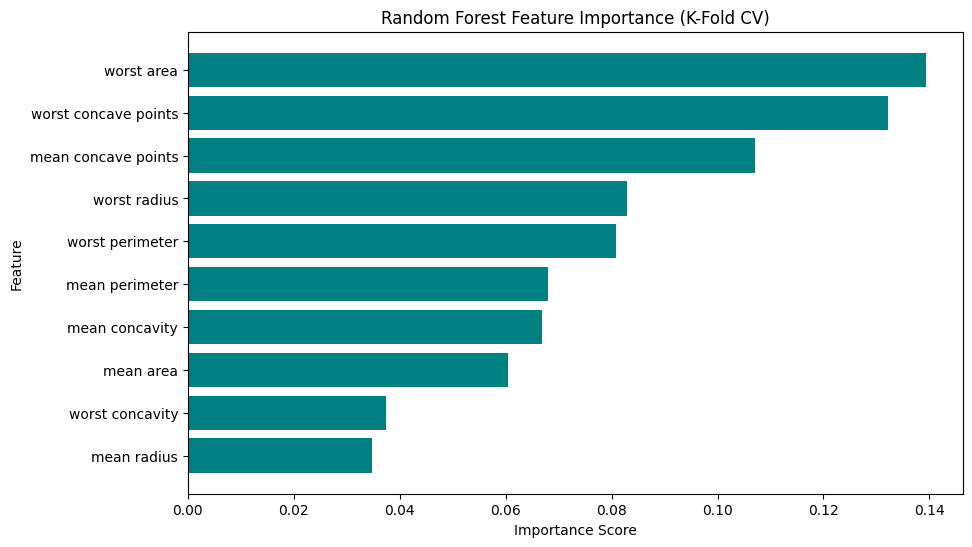

In [5]:

# Visualize feature importances
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importance (K-Fold CV)")
plt.barh(range(10), importances[indices[:10]][::-1], color='teal')
plt.yticks(range(10), X.columns[indices[:10]][::-1])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Top 2 features: ['worst area', 'worst concave points']


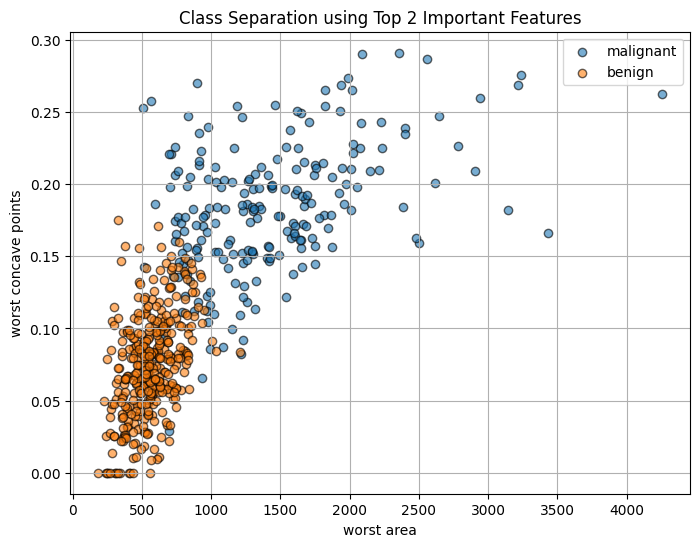

In [14]:
import matplotlib.pyplot as plt

# Get the indices of the two most important features
top2_feature_indices = indices[:2]
top2_features = X.columns[top2_feature_indices]

print(f"Top 2 features: {top2_features.tolist()}")

# Plot the two features using class labels
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(
        X[top2_features[0]][y.iloc[:, 0] == label],
        X[top2_features[1]][y.iloc[:, 0] == label],
        label=data.target_names[label],
        alpha=0.6,
        edgecolor='k'
    )

plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title("Class Separation using Top 2 Important Features")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
top2_features.tolist()

['worst area', 'worst concave points']


## 🔍 Explanation

- **K-Fold Cross Validation** splits the data into K parts (here, K=5). The model is trained K times, each time using a different fold as validation.
- This approach provides a more **robust estimate** of model performance than a single train/test split.
- After evaluating accuracy using CV, we retrain on the **entire dataset** to compute feature importances.
- `rf.feature_importances_` shows how much each feature contributes to reducing impurity in the forest.

✅ **Takeaway:** K-Fold CV ensures a more reliable performance estimate, while feature importance helps interpret which variables have the most impact on predictions.
